In [176]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

In [177]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

from sklearn.preprocessing import PowerTransformer, FunctionTransformer

## Strength of Concrete Use Case 
### Regression problem statement

In [178]:
df = pd.read_csv('/Users/abhishekwaghchaure/Desktop/Datasets/concrete_data.csv')

In [179]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [181]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

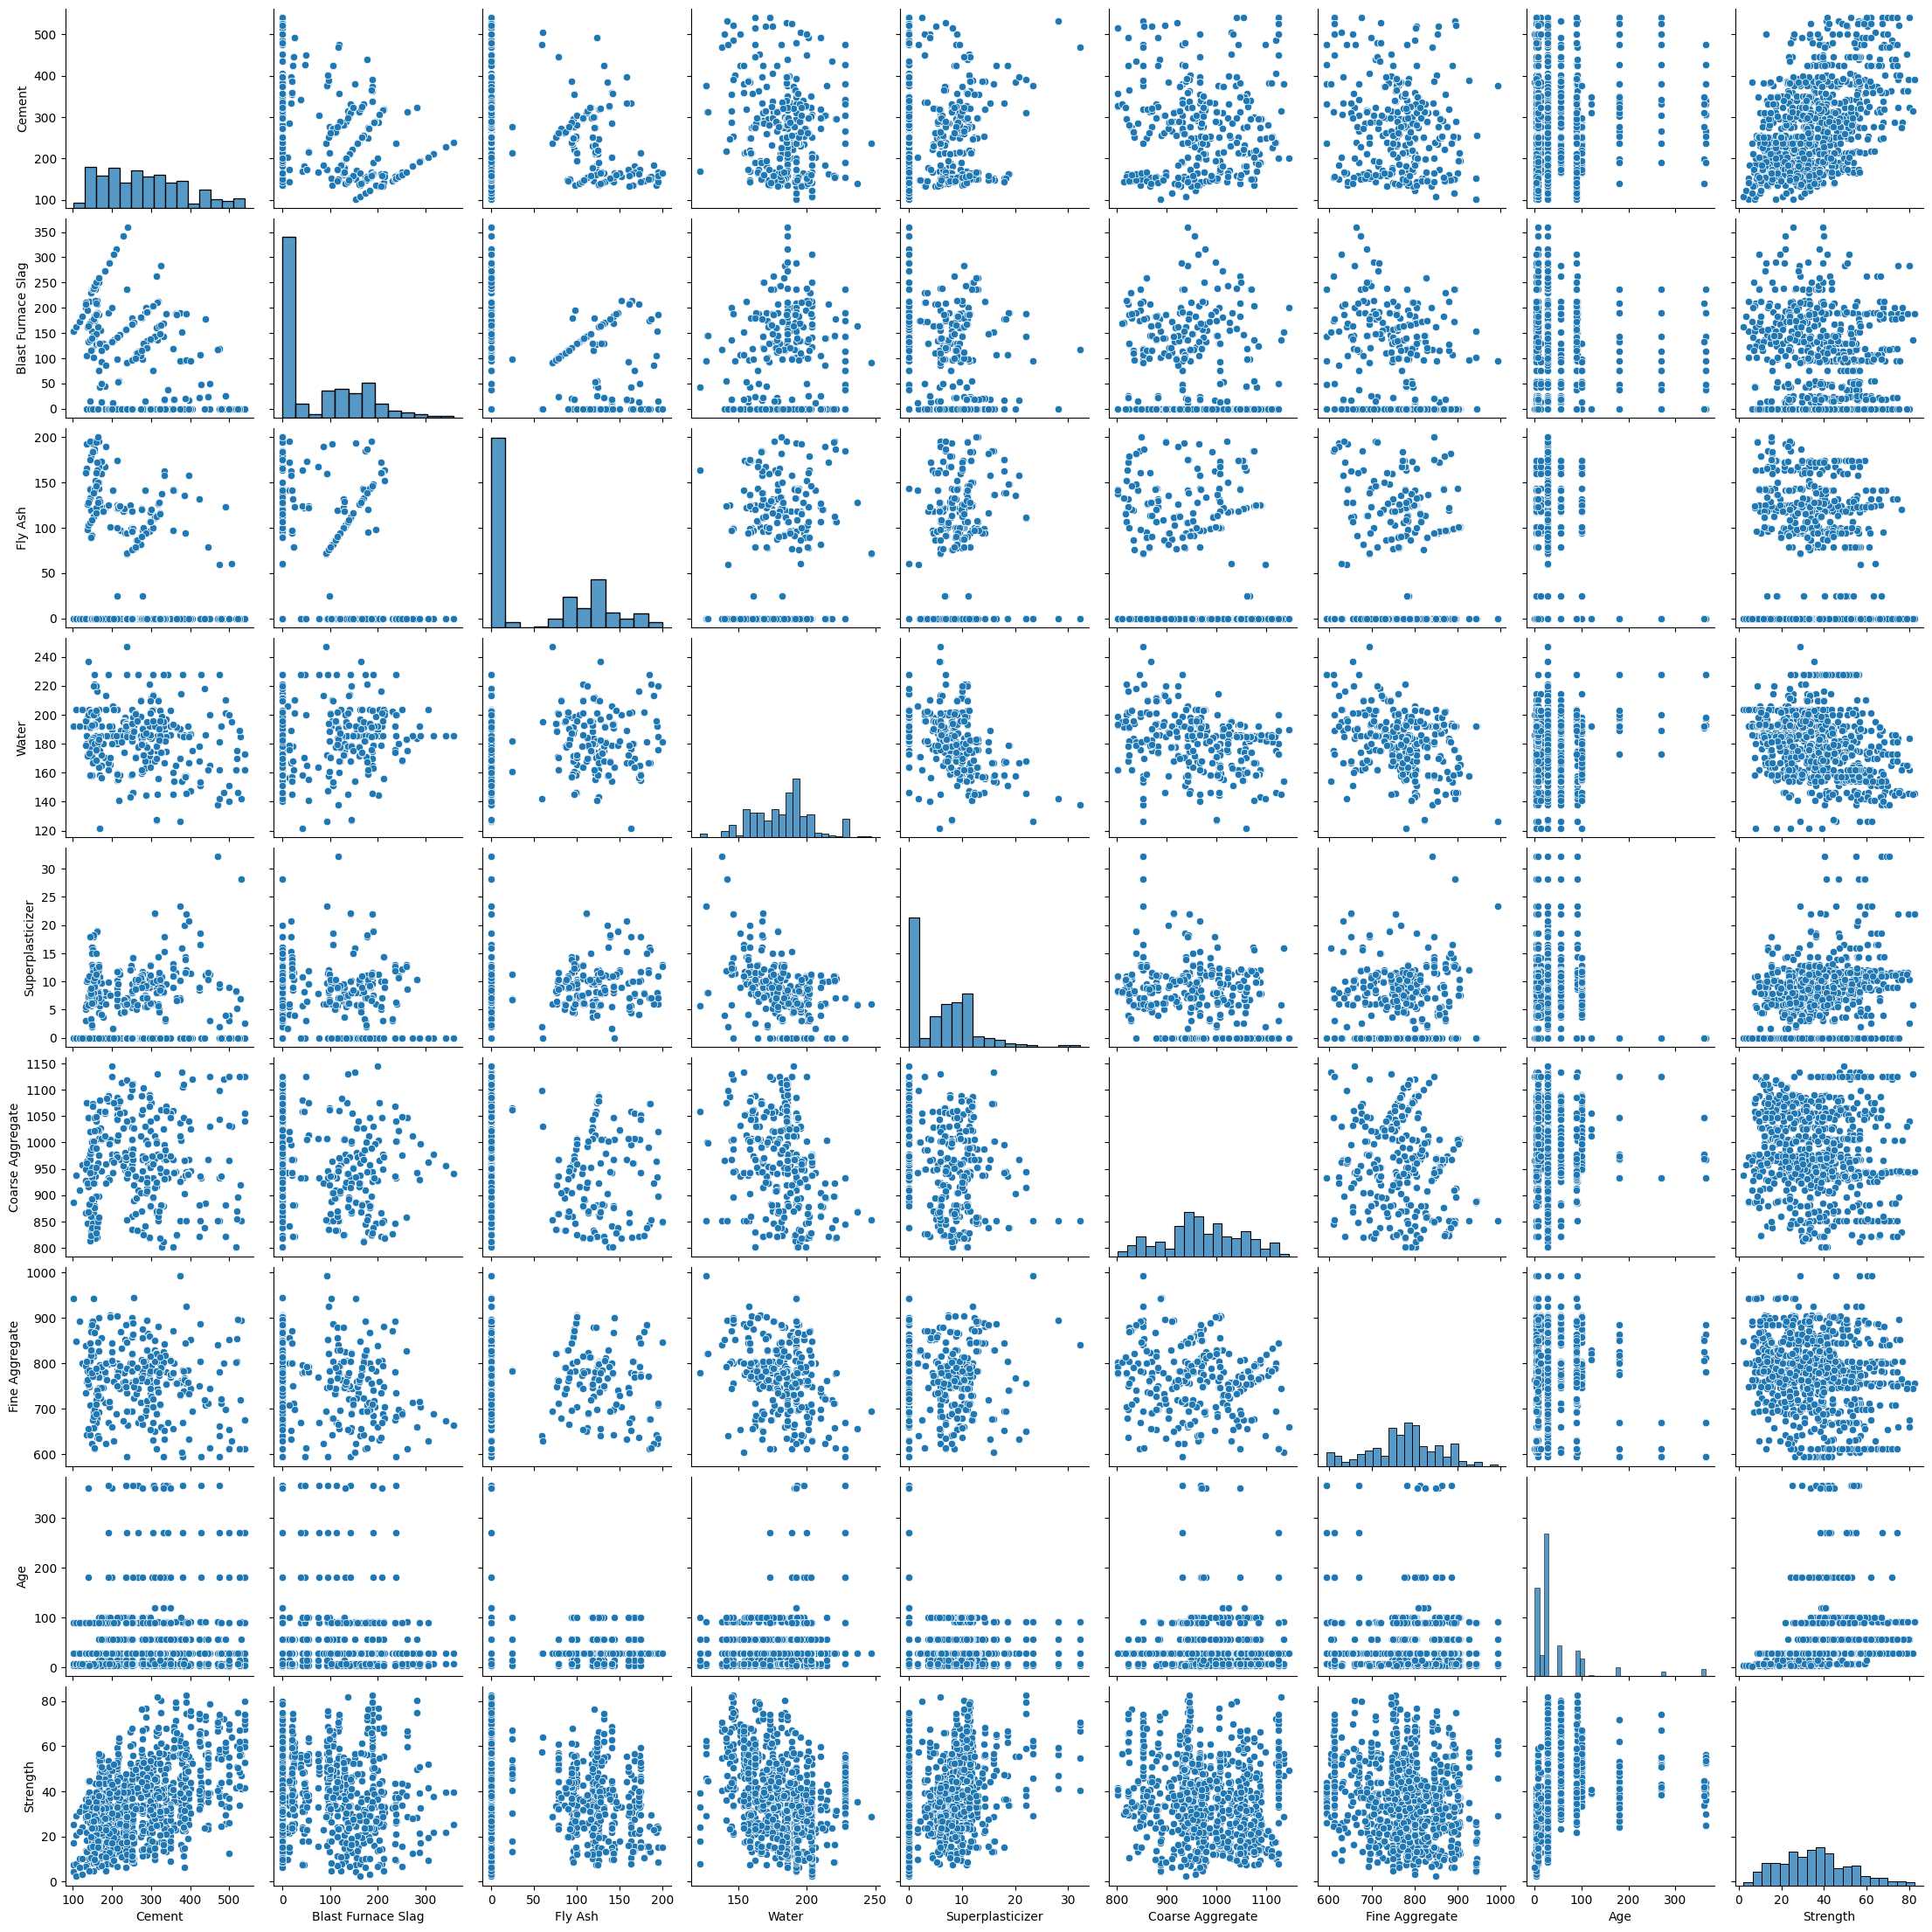

In [182]:
sns.pairplot(df)

Can be seen that most of the data is right skewed

Which means that the data follows log normal distribution....

And as this is linear regression problem statement and regression works well with normal data we need to convert this log normal distributions into Normal distributions....
For this we can use Function transformer(Log transform, inverse transform, square transform, square root transform)to work on or else we can use power transformers (Box Cox transform, )

In [183]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


For fly ash and superplasticizer we can see min value is zero so here as we are using Box Cox power transformer which has the limitation that it doesnt perform good if the data < 30 and negative

In [184]:
X = df.drop(columns = ['Strength'])
y = df['Strength']

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=32)

In [186]:
linear_regressor = LinearRegression()

linear_regressor.fit(X_train, y_train)
pred = linear_regressor.predict(X_test)

r2 = r2_score(y_test, pred)

print(f"The r2 score for the model without parameter tuning, scaling and distribution transformation is : {r2}")

The r2 score for the model without parameter tuning, scaling and distribution transformation is : 0.5848844773455901


In [187]:
score_after_cross_val = np.mean(cross_val_score(linear_regressor,X_train,y_train,scoring='r2', cv = 10))
print(f"After cross validating the score is : {score_after_cross_val}")

After cross validating the score is : 0.5972235628410605


As we can see the result is very poor

Plotting the distplots and QQ plots without any transformations....
QQ plots will tell us if the distribution is noraml or not.......

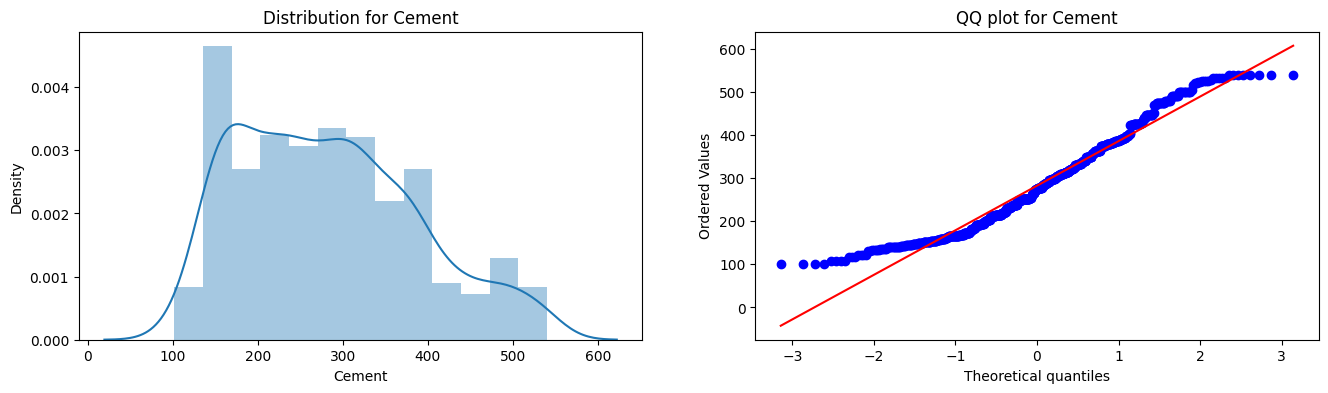

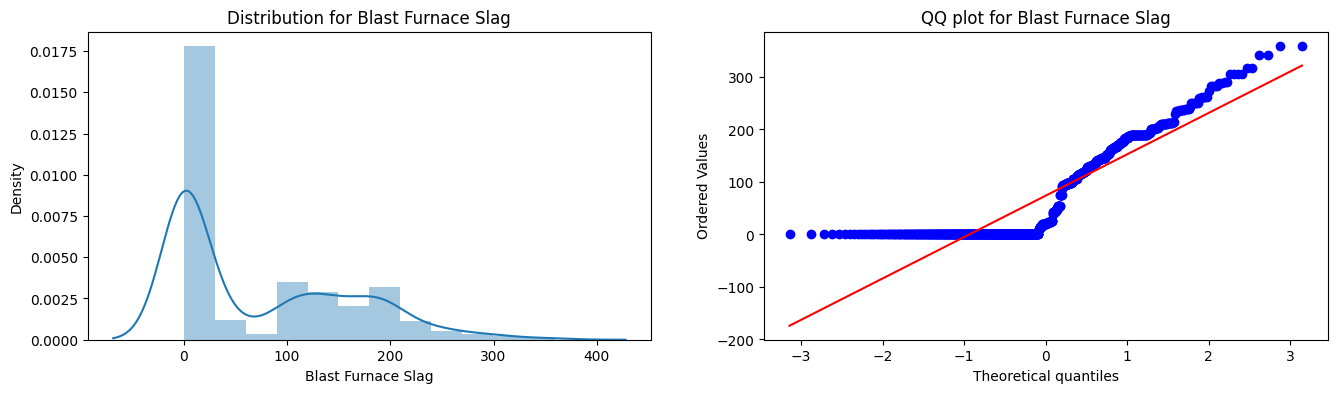

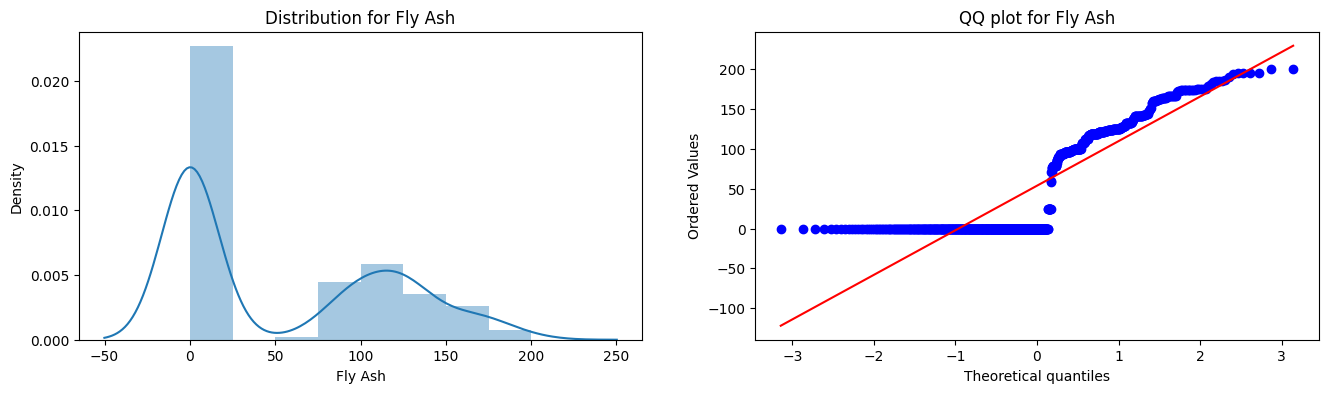

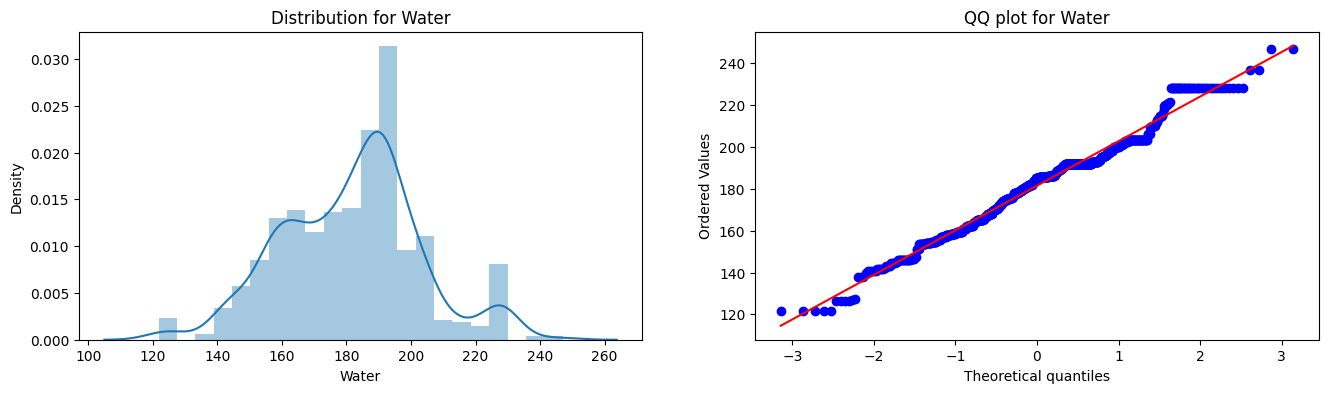

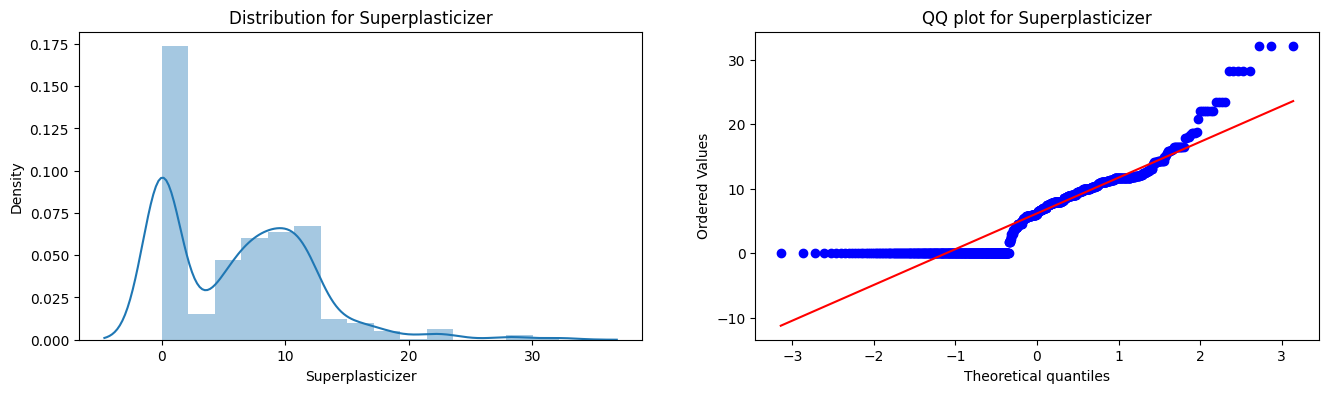

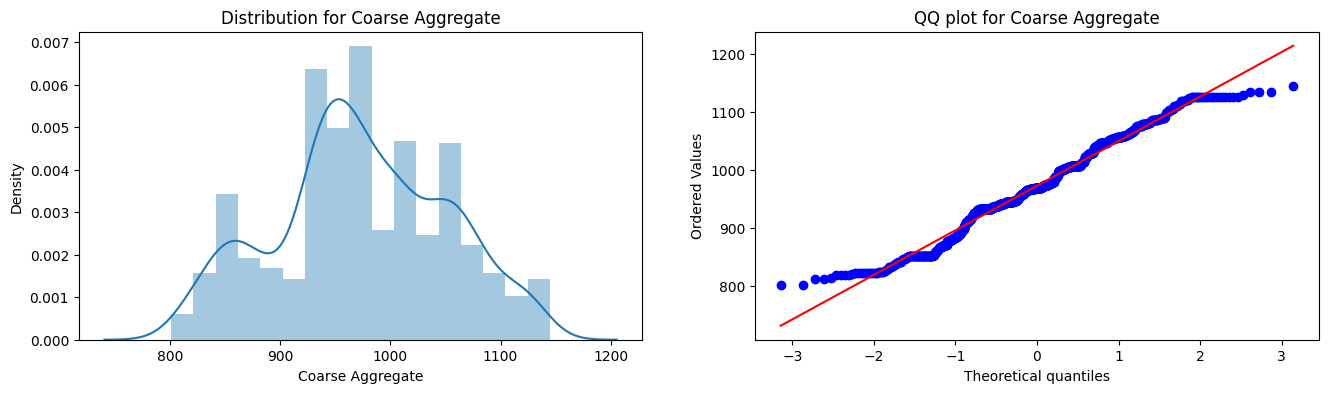

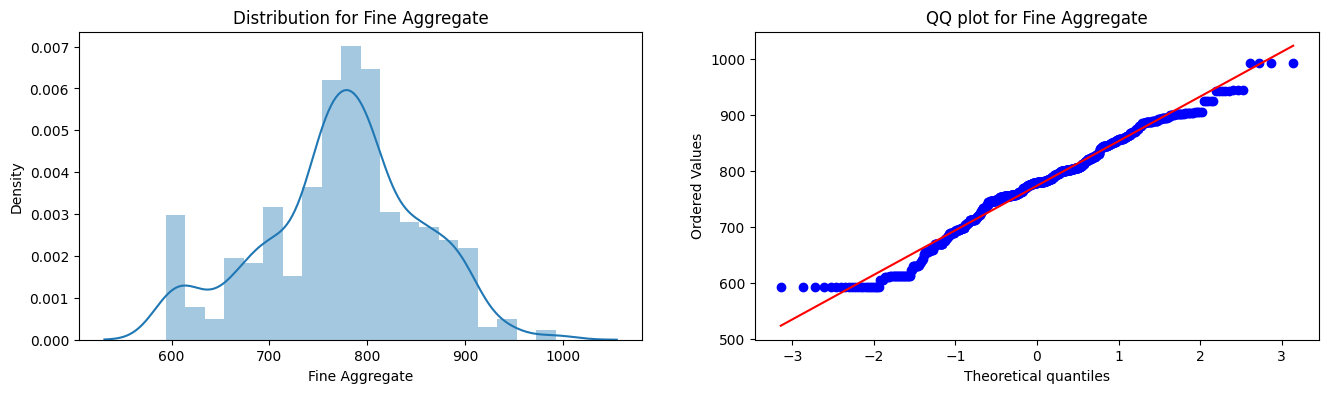

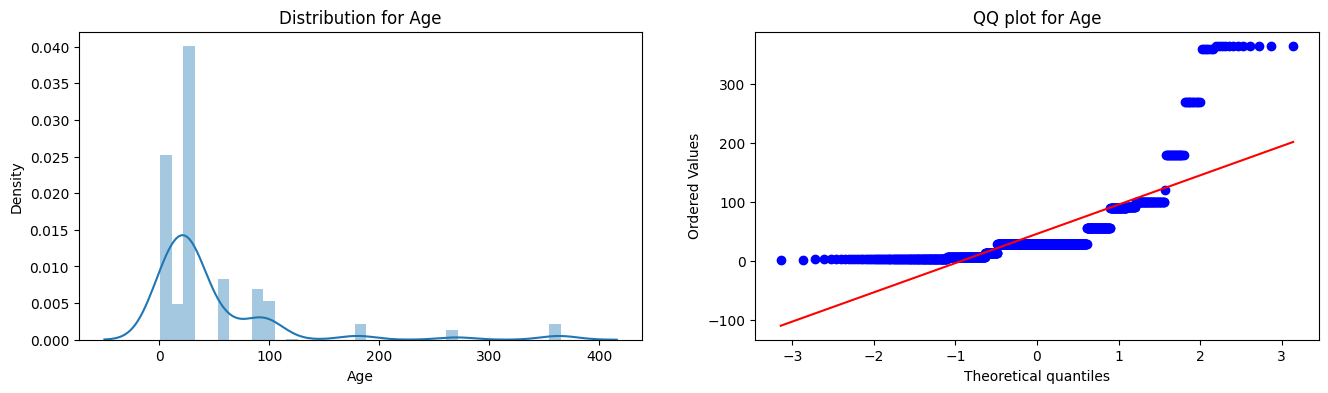

In [188]:
## Plotting the distplots and QQ plots without any transformations
for col in X_train.columns:
    plt.figure(figsize=(16,4))
    
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(f'Distribution for {col}')
    
    plt.subplot(122)
    stats.probplot(X_train[col], dist='norm', plot = plt)
    plt.title(f"QQ plot for {col}")
    
    plt.show()
    

Applying Box Cox Transform one of the power transformer...

In [189]:
pt = PowerTransformer(method='box-cox')

X_train_transformed = pt.fit_transform(X_train + 0.00001)  ## Added this noise as the box cox doesnt work if we have zero values or negative values
X_test_transformed = pt.transform(X_test + 0.00001)

In [190]:
pd.DataFrame({'cols': X_train.columns, 'box_cox_lambdas' : pt.lambdas_})

,cols,box_cox_lambdas
0,Cement,0.206865
1,Blast Furnace Slag,0.022601
2,Fly Ash,-0.039966
3,Water,0.943053
4,Superplasticizer,0.117367
5,Coarse Aggregate,1.028640
6,Fine Aggregate,1.817939
7,Age,0.044041


In [191]:
linear_regressor2 = LinearRegression()
linear_regressor2.fit(X_train_transformed, y_train)
ypred2 = linear_regressor2.predict(X_test_transformed)

score2 = r2_score(y_test,ypred2)

print(f"The r2 score after the box cox transformation is : {score2}")

The r2 score after the box cox transformation is : 0.8092551362565116


In [192]:
## Score after cross validationg

transformed_cross_val_score = np.mean(cross_val_score(linear_regressor2,X_train_transformed,y_train, cv =10, scoring = 'r2'))
print(f"The score after cross validating the transformed distribution is : {transformed_cross_val_score}")

The score after cross validating the transformed distribution is : 0.7924757970067389


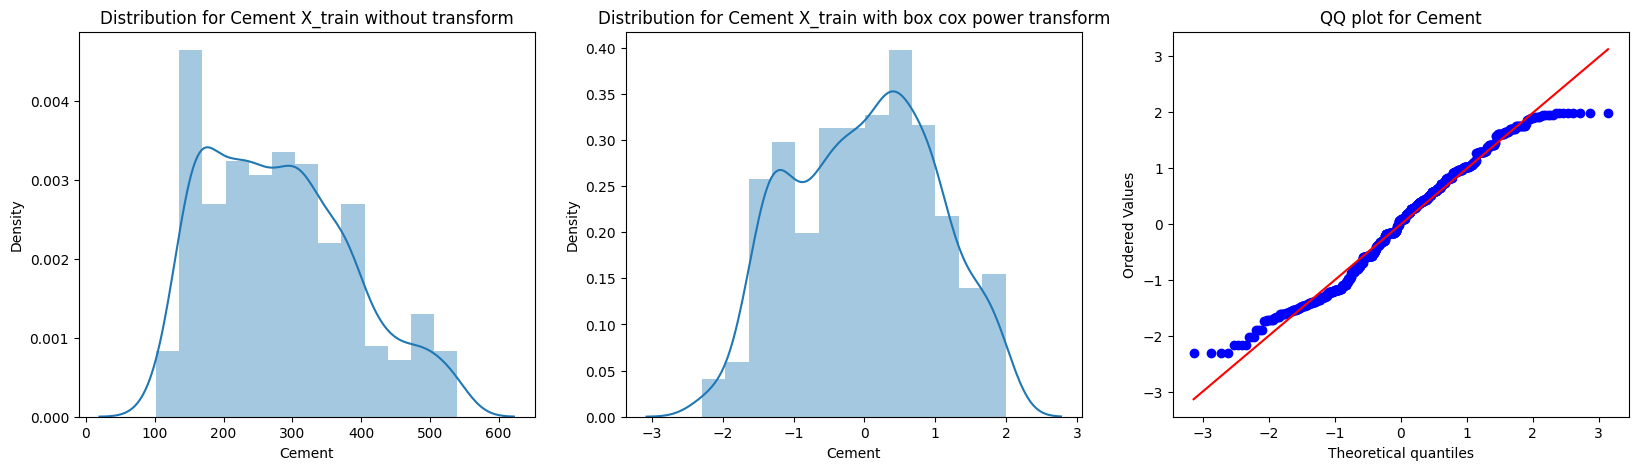

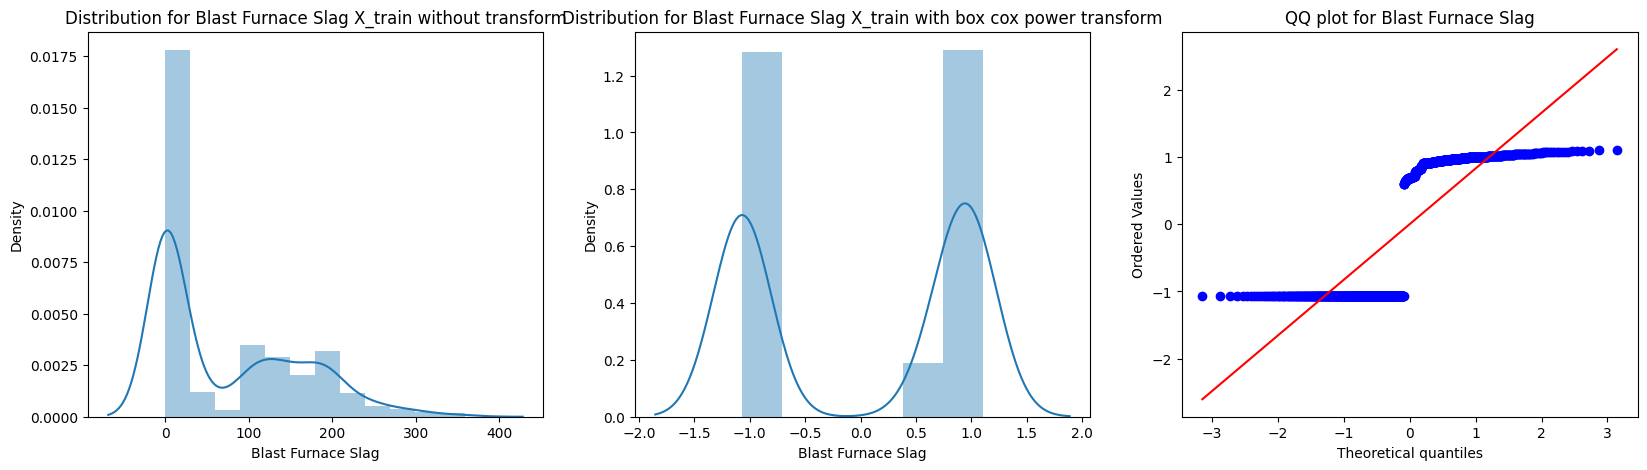

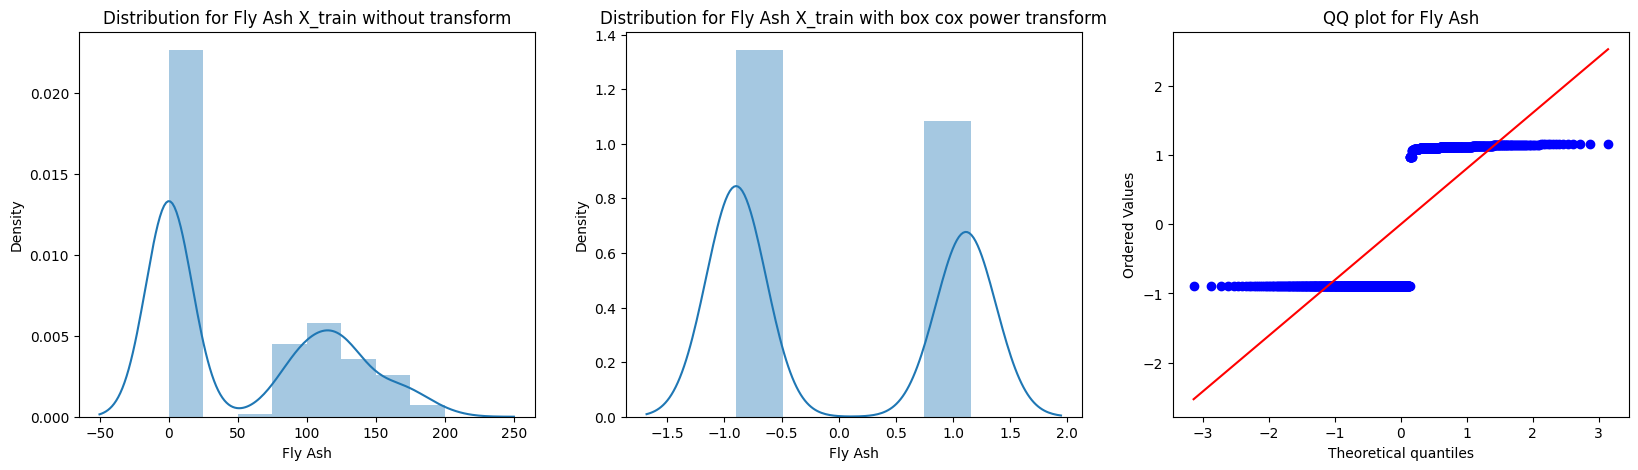

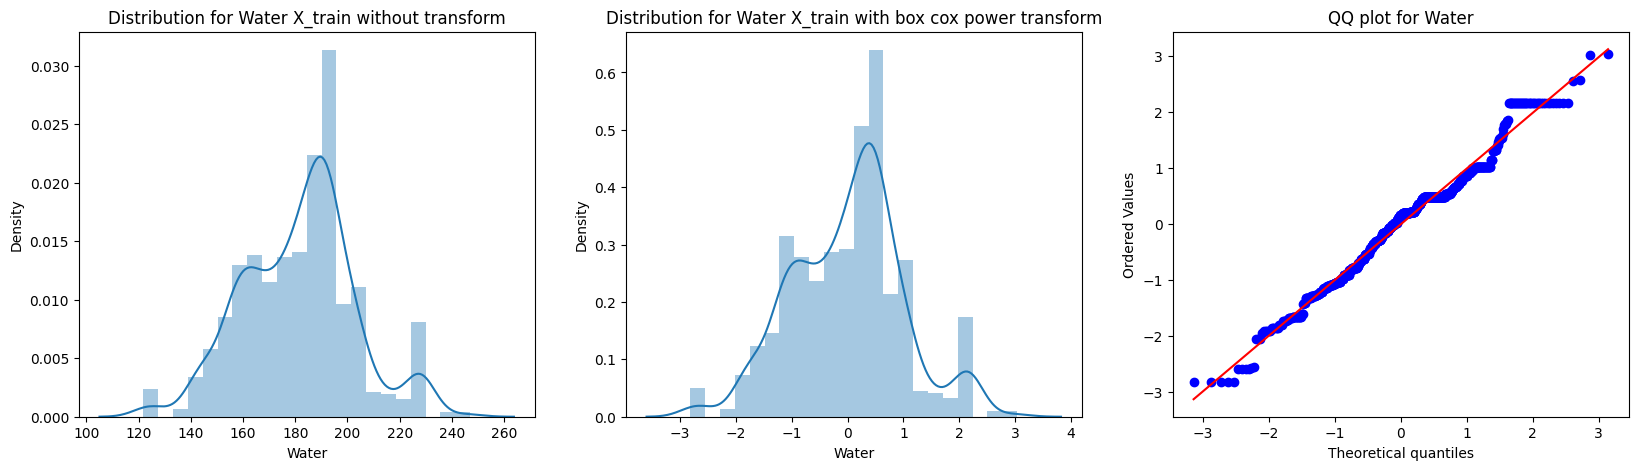

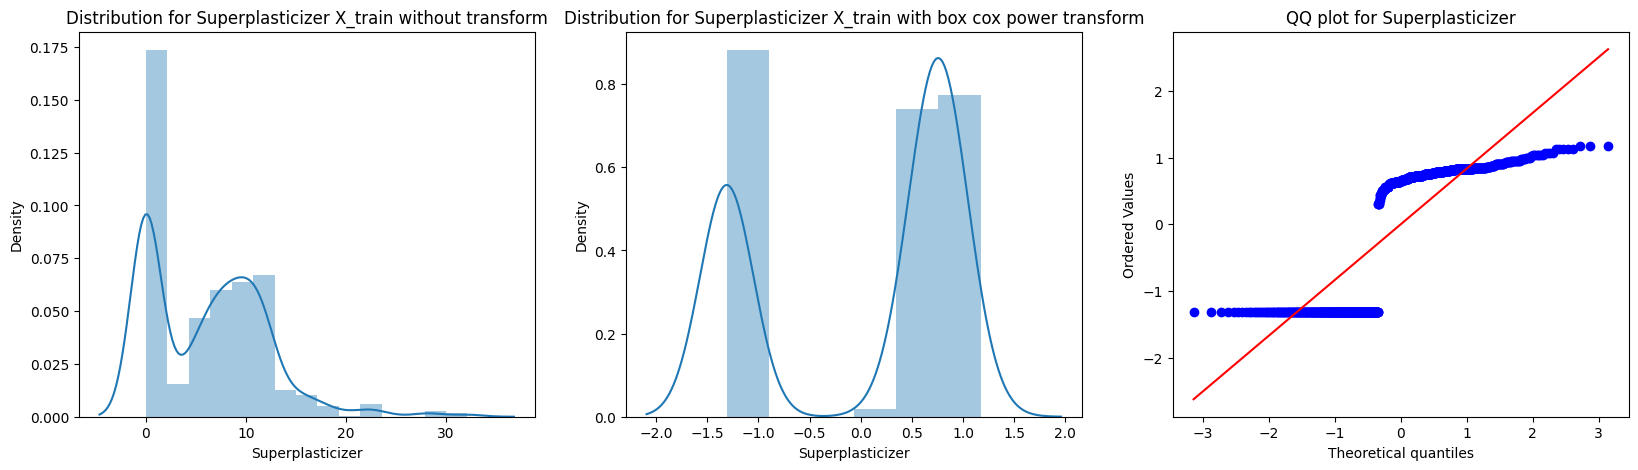

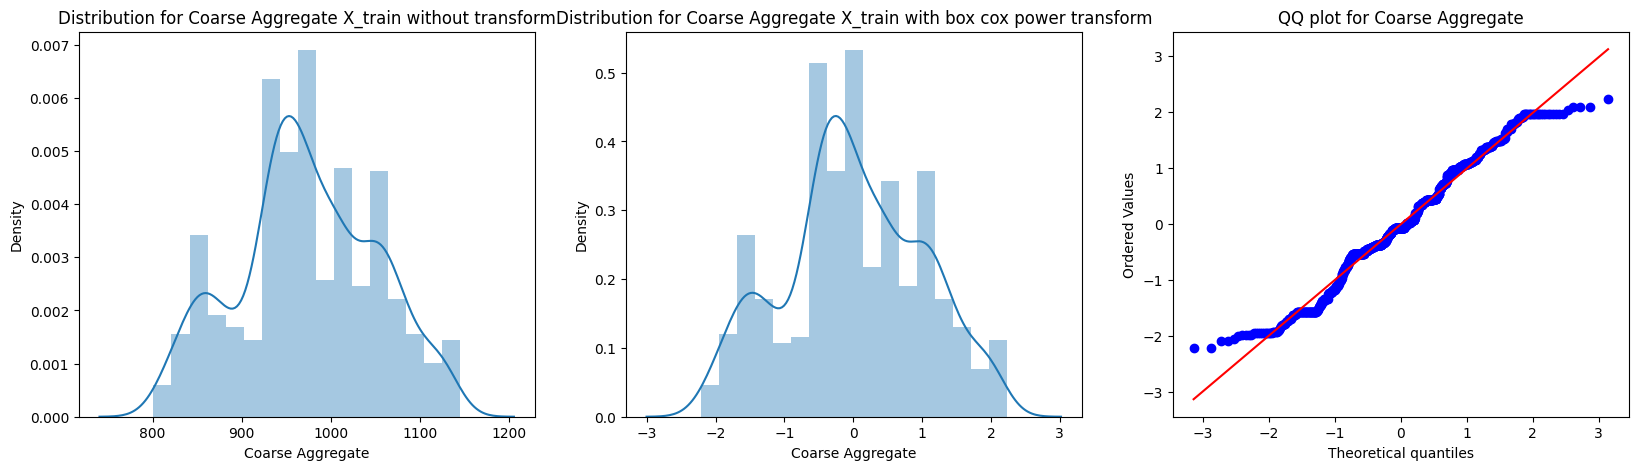

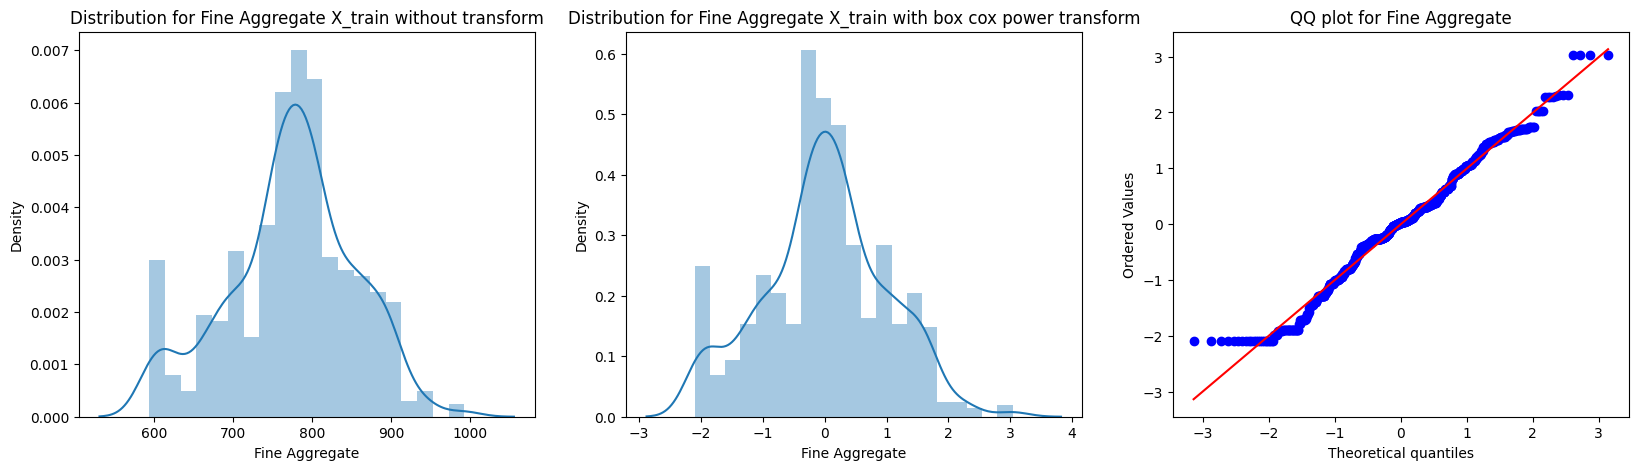

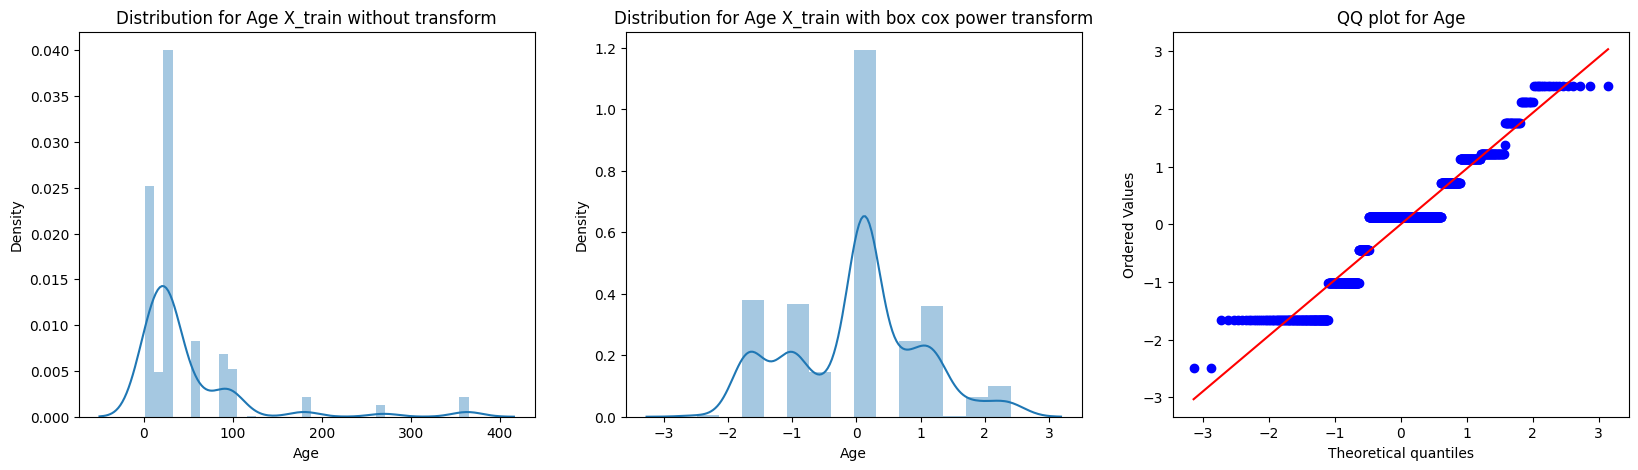

In [193]:
## Plotting the distplots and QQ plots after box cox power transformations

X_train_transformed = pd.DataFrame(X_train_transformed, columns=X_train.columns)
for col in X_train.columns:
    plt.figure(figsize=(20,5))
    
    plt.subplot(131)
    sns.distplot(X_train[col])
    plt.title(f'Distribution for {col} X_train without transform')
    
    plt.subplot(132)
    sns.distplot(X_train_transformed[col])
    plt.title(f'Distribution for {col} X_train with box cox power transform')
    
    plt.subplot(133)
    stats.probplot(X_train_transformed[col], dist='norm', plot = plt)
    plt.title(f"QQ plot for {col}")
    
    plt.show()
    

 Now Applying Yeo Jhonson Power Transformer for transformations

In [197]:
power_transformer = PowerTransformer('yeo-johnson')

X_train_transformed2 = power_transformer.fit_transform(X_train) 
X_test_transformed2 = power_transformer.transform(X_test)

linear_regressor3 = LinearRegression()
linear_regressor3.fit(X_train_transformed2, y_train)

pred3 = linear_regressor3.predict(X_test_transformed2)
score = r2_score(y_test, pred3)

print(f"The r2 score after applying the Yeo Jhonson power transformer is : {score}")


The r2 score after applying the Yeo Jhonson power transformer is : 0.8153725481060059


In [198]:
cross_val_scor_yeo_jhonson = np.mean(cross_val_score(linear_regressor3, X_train_transformed2, y_train, cv = 10))
print(f"score after cross validating the yeo jhonson transformed data is : {cross_val_scor_yeo_jhonson}")

score after cross validating the yeo jhonson transformed data is : 0.7952944319513946


In [199]:
pd.DataFrame({'cols' : X_train.columns, 'Yeo_Jhonson_lambdas' : power_transformer.lambdas_})

,cols,Yeo_Jhonson_lambdas
0,Cement,0.204253
1,Blast Furnace Slag,0.001094
2,Fly Ash,-0.145648
3,Water,0.942666
4,Superplasticizer,0.266082
5,Coarse Aggregate,1.028765
6,Fine Aggregate,1.819066
7,Age,-0.003578


In [203]:
X_train_transformed2 = pd.DataFrame(X_train_transformed2, columns=X_train.columns)

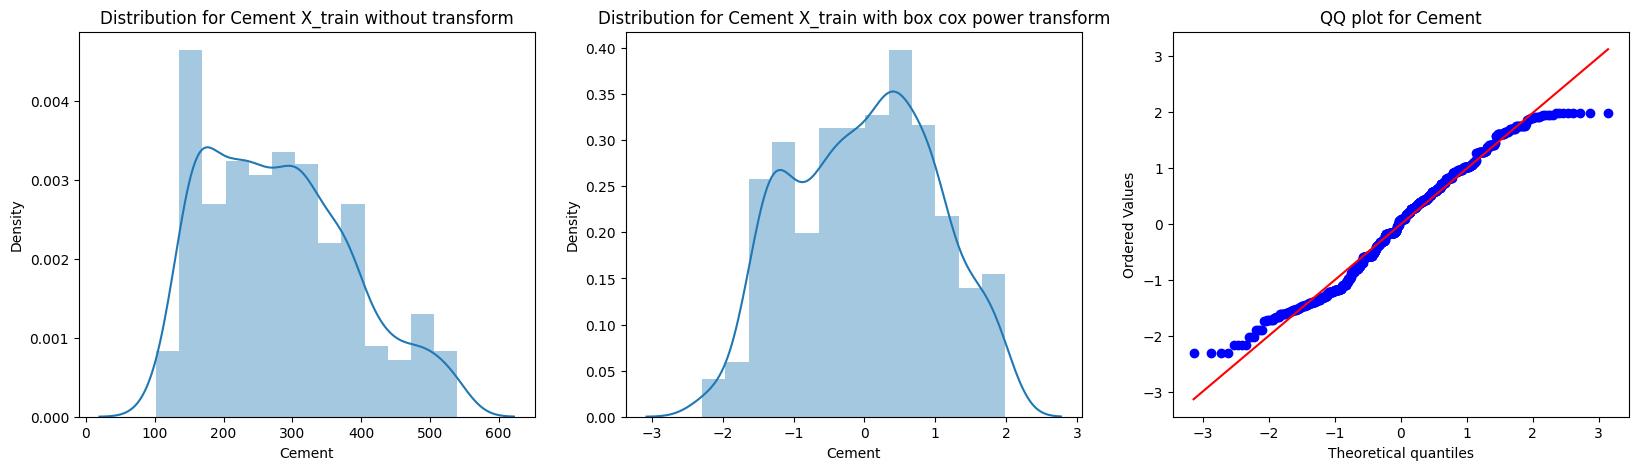

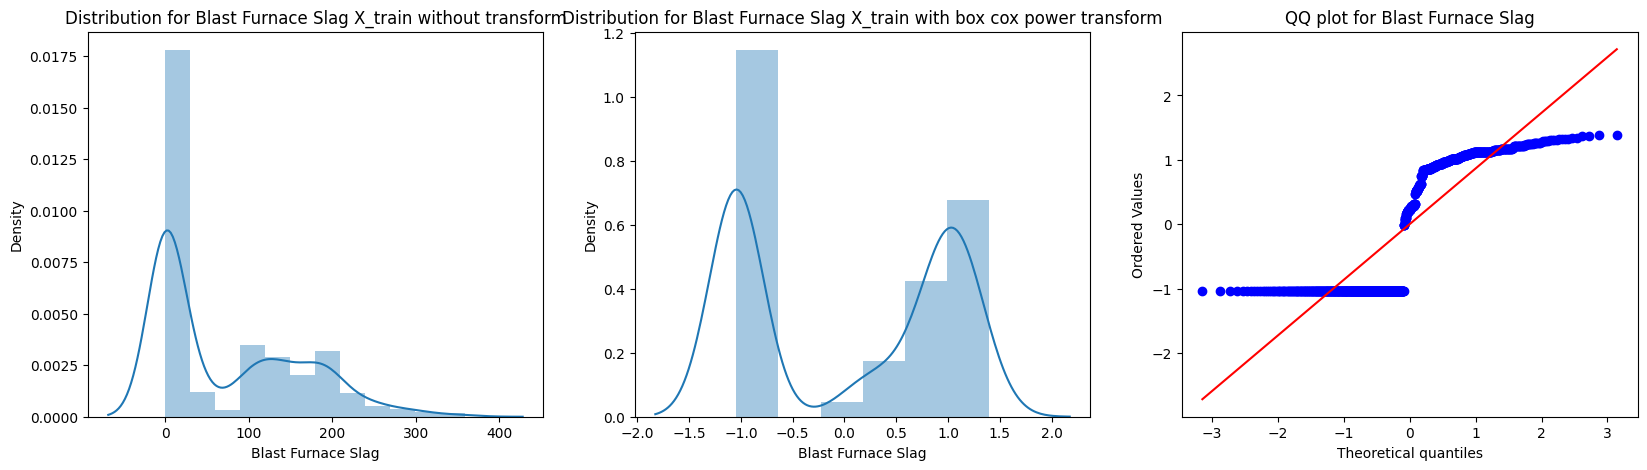

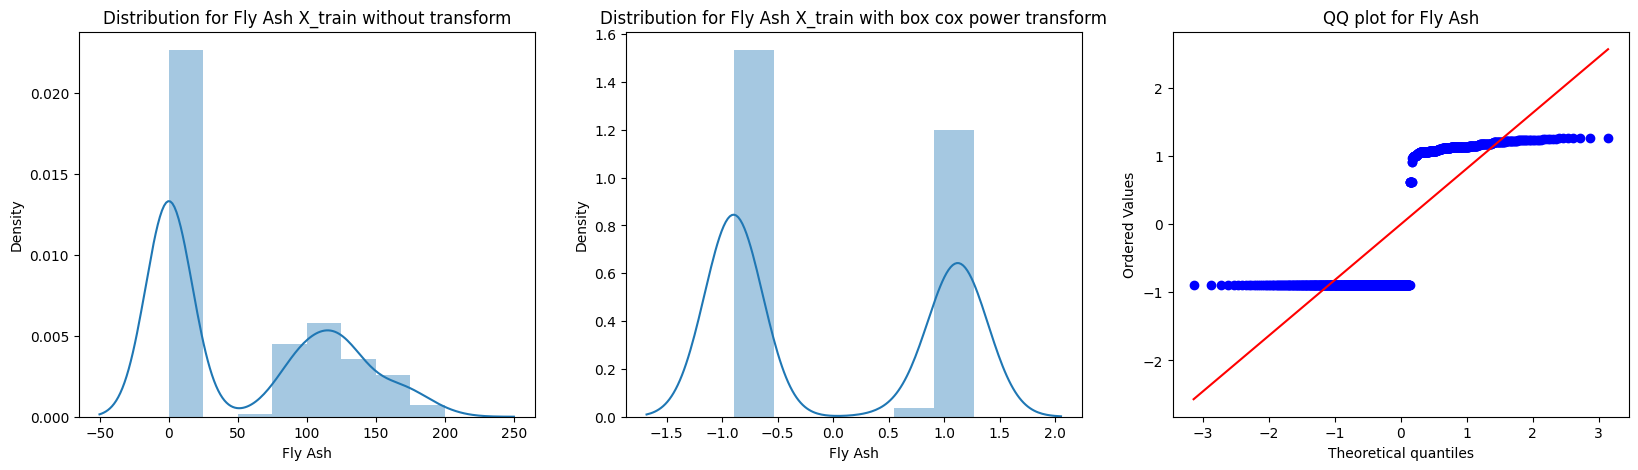

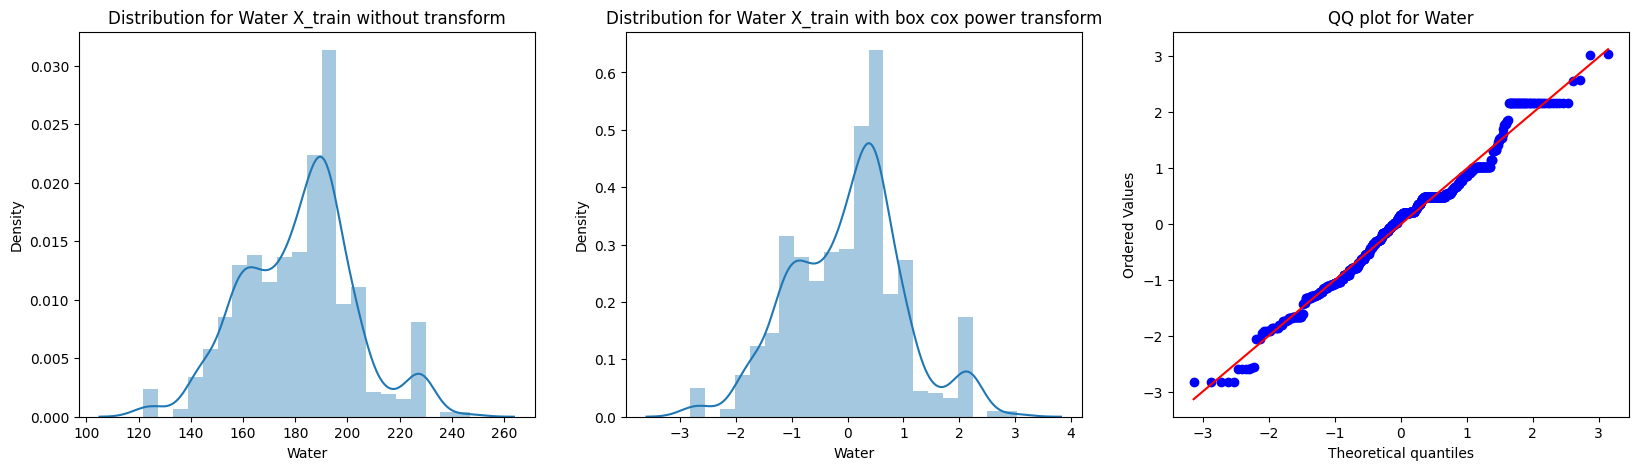

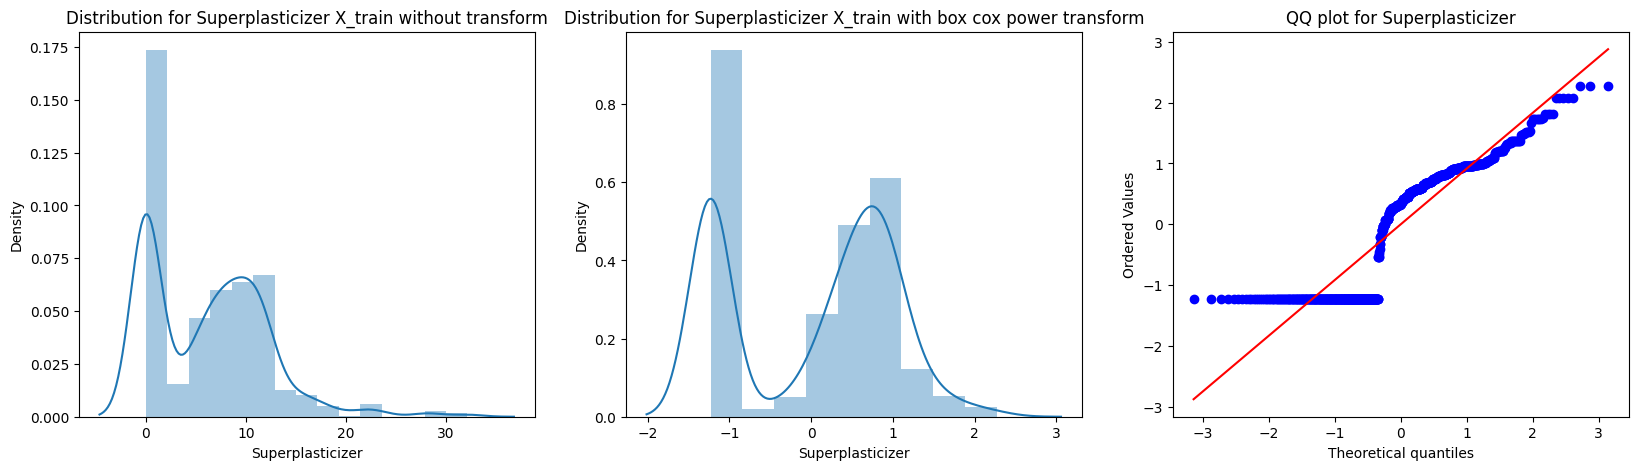

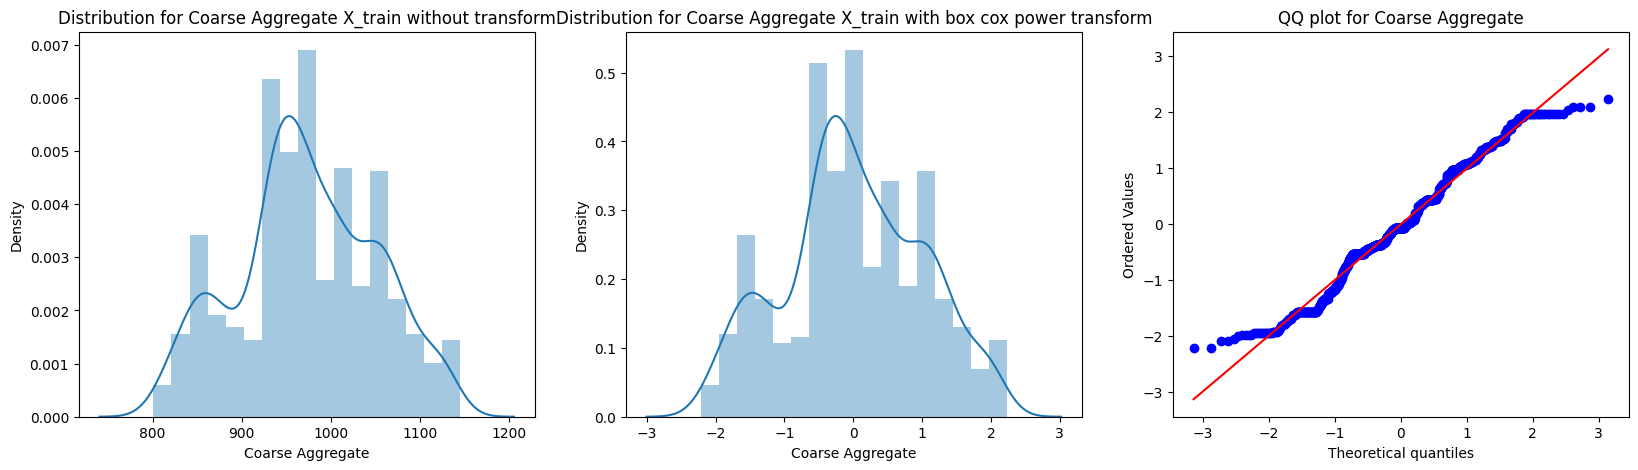

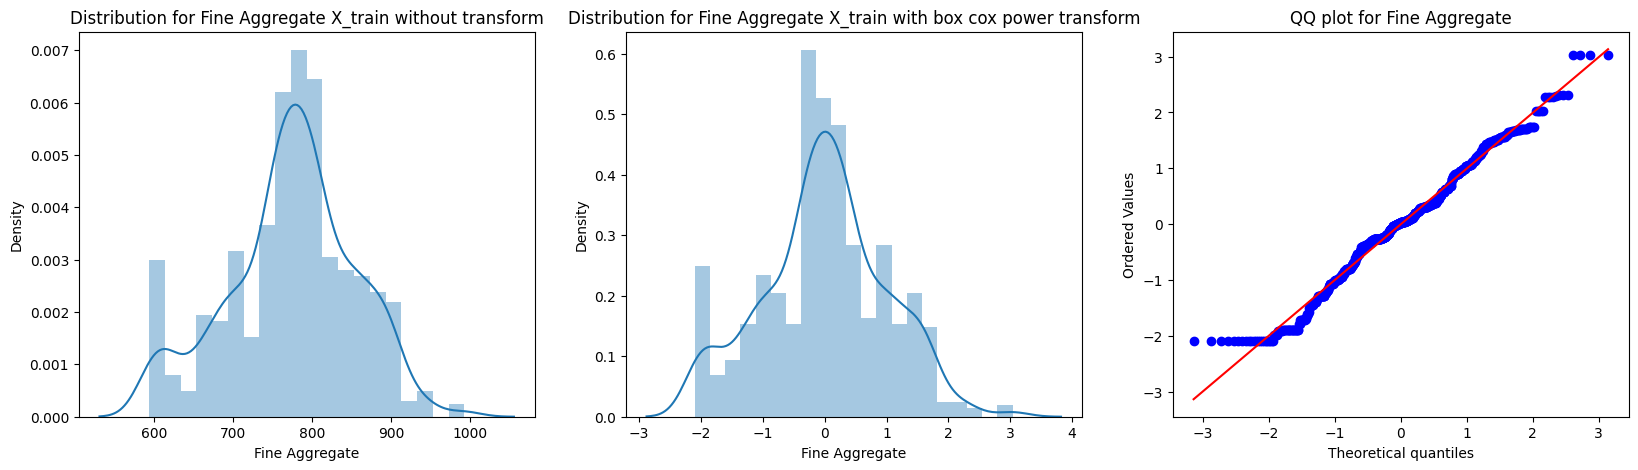

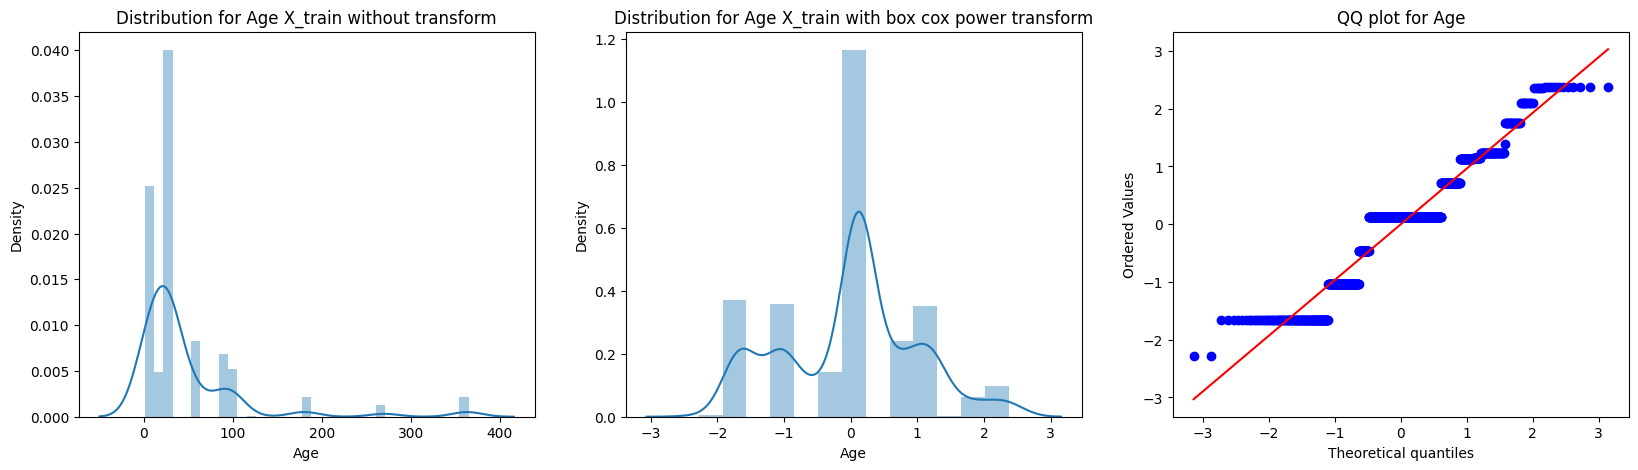

In [204]:
## Plotting the distplots and QQ plots after yeo Jhonson power transformations


for col in X_train.columns:
    plt.figure(figsize=(20,5))
    
    plt.subplot(131)
    sns.distplot(X_train[col])
    plt.title(f'Distribution for {col} X_train without transform')
    
    plt.subplot(132)
    sns.distplot(X_train_transformed2[col])
    plt.title(f'Distribution for {col} X_train with box cox power transform')
    
    plt.subplot(133)
    stats.probplot(X_train_transformed2[col], dist='norm', plot = plt)
    plt.title(f"QQ plot for {col}")
    
    plt.show()
    